In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


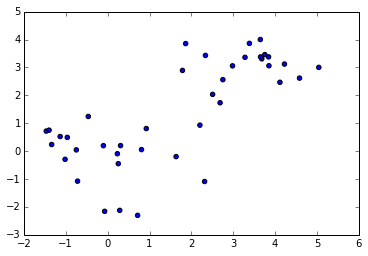

In [24]:
seed(124)
x = randn(20)
y = randn(20)
x = hstack((x, randn(20)+3))
y = hstack((y, randn(20)+3))
scatter(x,y);

In [25]:
#from https://en.wikipedia.org/wiki/DBSCAN

In [26]:
def euc_dist(x1, y1, x2, y2):
    return sqrt((x1-x2)**2 + (y1-y2)**2)
euc_dist(0,0,4,3)

5.0

In [33]:
n = len(x)
distances = array([[None for i in range(n)] for j in range(n)])
for i in range(n):
    for j in range(i,n):
        dist = euc_dist(x[i],y[i],x[j],y[j])
        distances[i][j] = dist
        distances[j][i] = dist

distances[0]        

array([0.0, 3.4488375243450782, 2.866914883799955, 2.2776270943282029,
       3.3409352813773356, 2.4032327388586876, 2.2476628182336889,
       2.3512138681741854, 3.0001956280664035, 1.45420042286315,
       2.9006639179013214, 1.6737955297685316, 2.3212401401077876,
       0.36167241906812231, 3.0059395245642433, 2.3515180823692132,
       2.2394977098066948, 2.0309886769892831, 3.3343377804876888,
       0.4630056568607524, 6.4045886210029526, 5.9774682424720726,
       6.291437670419179, 6.5574115609117136, 6.2493938800985811,
       5.2941250834300275, 6.9919645306094527, 5.9191868521665052,
       4.5412593046025105, 6.1825413492401609, 6.9843179580445627,
       6.5500985947701302, 6.3978050656363203, 5.8391796506762699,
       3.6055595525504711, 6.7398753201872488, 5.2353162706105065,
       6.5723715040595394, 6.4479522830147991, 4.7136023766395807], dtype=object)

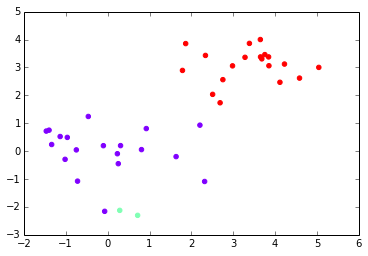

In [105]:
def dbscan(d,e,m):
    """d = Distance matrix, e = min_distance to search, 
    m = minimum number of points needed to be considered dense"""
    n = len(d)
    visited = [False for i in range(n)]
    output = [0 for i in range(n)]
    seed  = 0
    stack = set()
    cluster = 0
    while True:
        #print(seed, stack)
        if(seed >= n):
            break
        if (visited[seed] == True):
            seed += 1
            continue
        visited[seed] = True
        within_e = distances[seed]<e
        num_within_e = sum(within_e)
        if(num_within_e>m):
            if((len(stack) == 0) and (output[seed] == 0)):
                cluster += 1
                output[seed] = cluster
            for j in range(n):
                if((within_e[j] == True) and (visited[j] == False)):
                    stack.add(j)
                    output[j] = cluster

        if(len(stack) == 0):
            seed += 1           
        else:
            seed = stack.pop()
    return array(output)
                      
        
clusters = dbscan(distances, 1.7, 7)
colors = cm.rainbow(np.linspace(0, 1, max(clusters)+1))
labels = [i for i in range(max(clusters)+1)]
shuffle(colors)
for i in range(len(x)):   
    c = clusters[i]
    scatter(x[i],y[i], color = colors[c])

In [104]:
clusters

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2])